In [11]:
pip install python-picard


     ---------------------------------------- 7.1/7.1 MB 8.0 MB/s eta 0:00:00
     ---------------------------------------- 95.0/95.0 kB 2.7 MB/s eta 0:00:00
     -------------------------------------- 302.2/302.2 kB 4.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [13]:
import mne
#data_path = mne.datasets.sample.data_path()
raw_fname = "C:/Users/Equipo/OneDrive/Escritorio/Introduccion_a_señales_biomedicas/Github/inb_2024_gh12/ISB_Informes/L10_Procesamiento_EEG/Datos_EEG_physionet/Subject03_1.edf"
raw = mne.io.read_raw_edf(raw_fname)
raw.crop(tmin=100, tmax=130)  # take 30 seconds for speed

# pick only EEG channels, muscle artifact is basically not picked up by MEG
# if you have a simultaneous recording, you may want to do ICA on MEG and EEG
# separately
raw.pick(picks="eeg", exclude="bads")

rename_dict = {
    'EEG Fp1': 'Fp1', 'EEG Fp2': 'Fp2', 'EEG F3': 'F3', 'EEG F4': 'F4', 
    'EEG F7': 'F7', 'EEG F8': 'F8', 'EEG T3': 'T7', 'EEG T4': 'T8', 
    'EEG C3': 'C3', 'EEG C4': 'C4', 'EEG T5': 'P7', 'EEG T6': 'P8', 
    'EEG P3': 'P3', 'EEG P4': 'P4', 'EEG O1': 'O1', 'EEG O2': 'O2', 
    'EEG Fz': 'Fz', 'EEG Cz': 'Cz', 'EEG Pz': 'Pz'
    # Agrega más mapeos si es necesario
}
raw.rename_channels(rename_dict)

# Excluir los canales que no están en el montaje estándar
channels_to_exclude = ['EEG A2-A1', 'ECG ECG']
raw.drop_channels(channels_to_exclude)

# Agregar ubicaciones de electrodos usando un montaje estándar
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)

# ICA works best with a highpass filter applied
raw.load_data()
raw.filter(l_freq=1.0, h_freq=None)

Extracting EDF parameters from C:\Users\Equipo\OneDrive\Escritorio\Introduccion_a_señales_biomedicas\Github\inb_2024_gh12\ISB_Informes\L10_Procesamiento_EEG\Datos_EEG_physionet\Subject03_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 15000  =      0.000 ...    30.000 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302 sec)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


<RawEDF | Subject03_1.edf, 19 x 15001 (30.0 s), ~2.2 MB, data loaded>

In [14]:
ica = mne.preprocessing.ICA(
    n_components=15, method="picard", max_iter="auto", random_state=97
)

ica.fit(raw)

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 15 components
Fitting ICA took 0.4s.


<ICA | raw data decomposition, method: picard (fit in 58 iterations on 15001 samples), 15 ICA components (19 PCA components available), channel types: eeg, no sources marked for exclusion>

Creating RawArray with float64 data, n_channels=15, n_times=15001
    Range : 50000 ... 65000 =    100.000 ...   130.000 secs
Ready.
Using matplotlib as 2D backend.


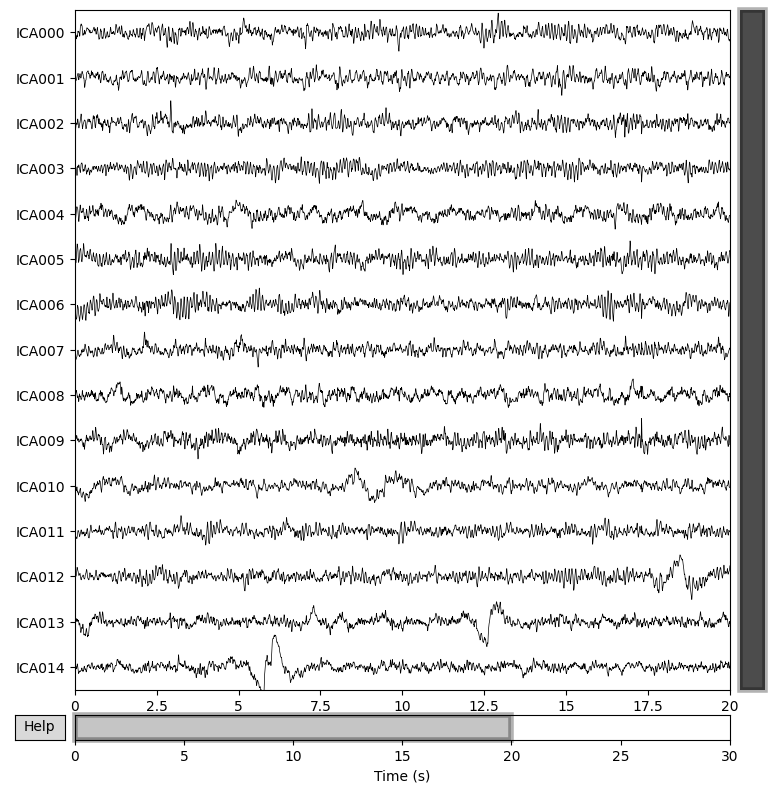

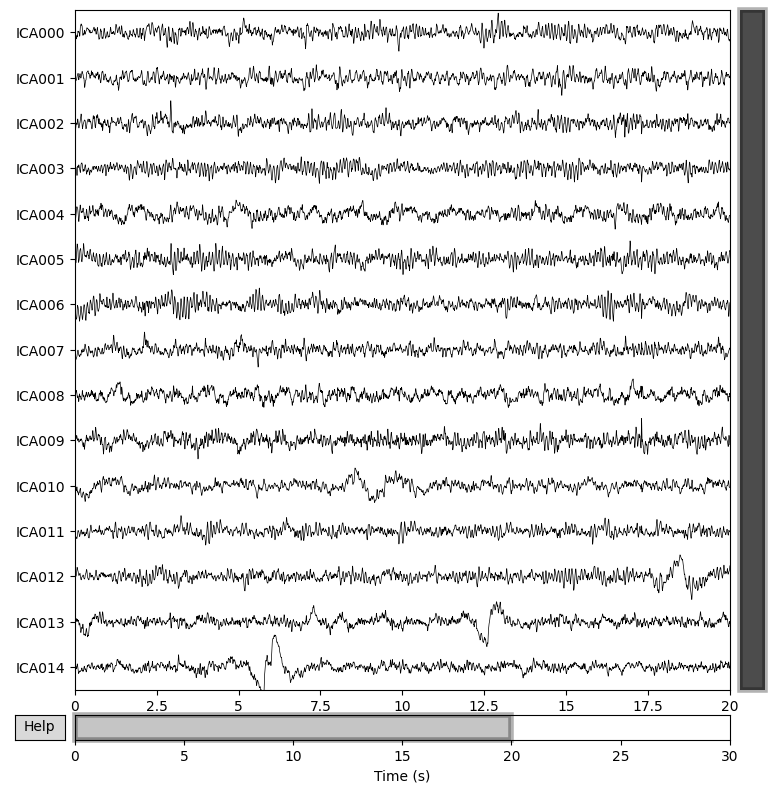

In [15]:
ica.plot_sources(raw)

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated


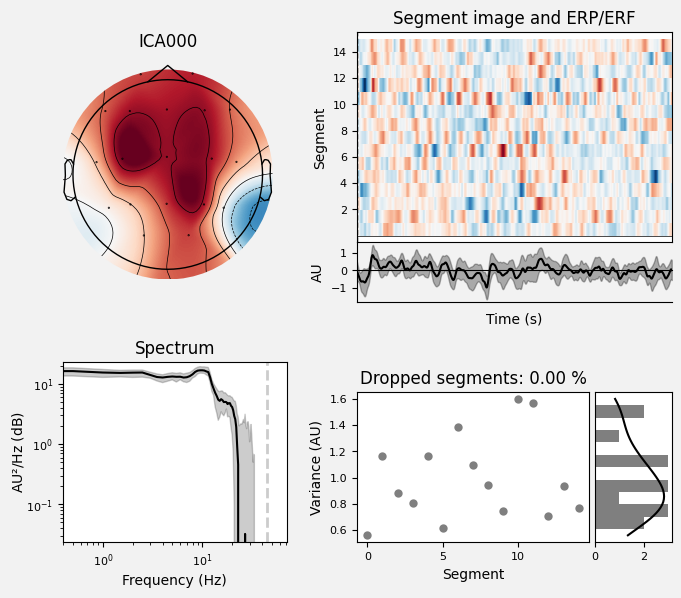

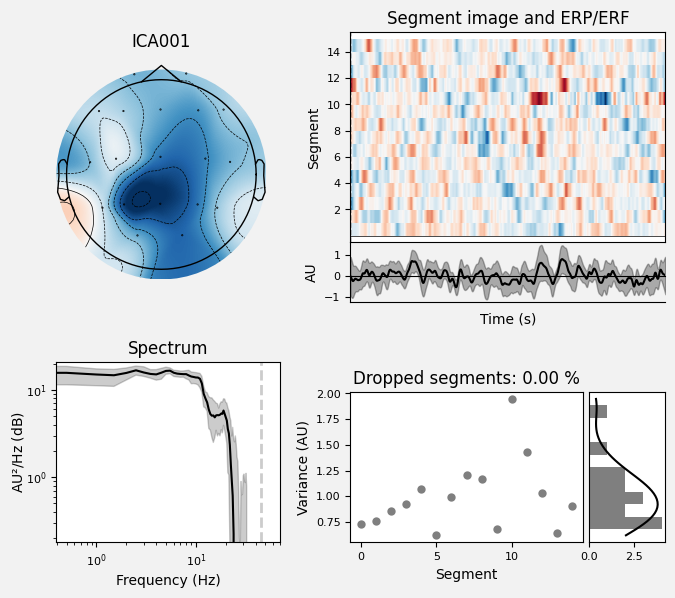

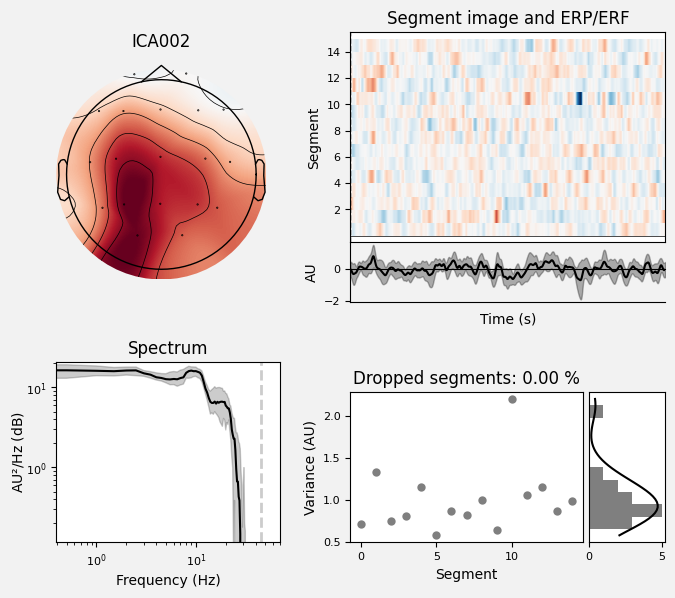

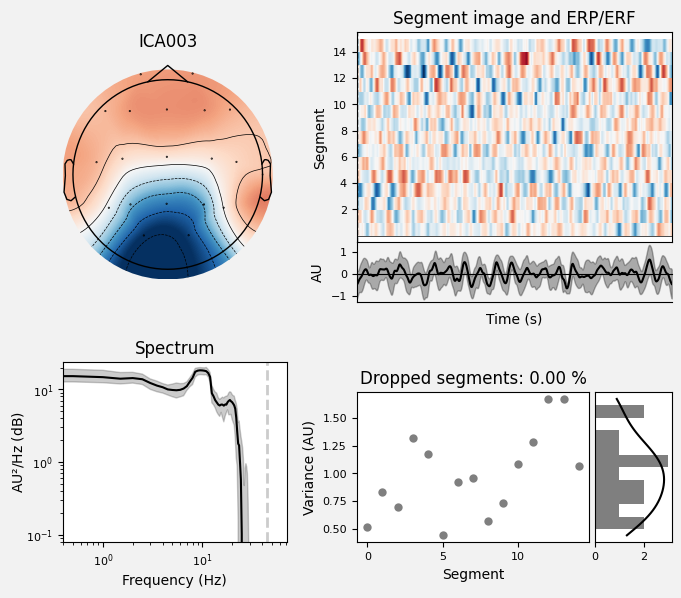

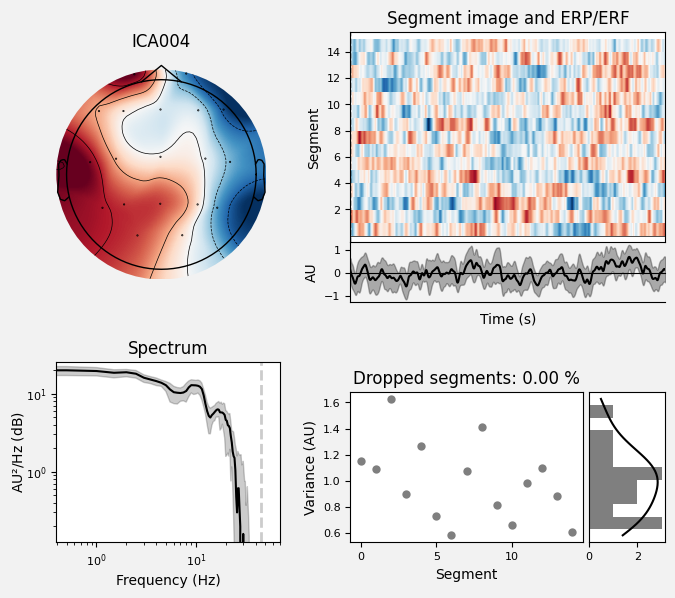

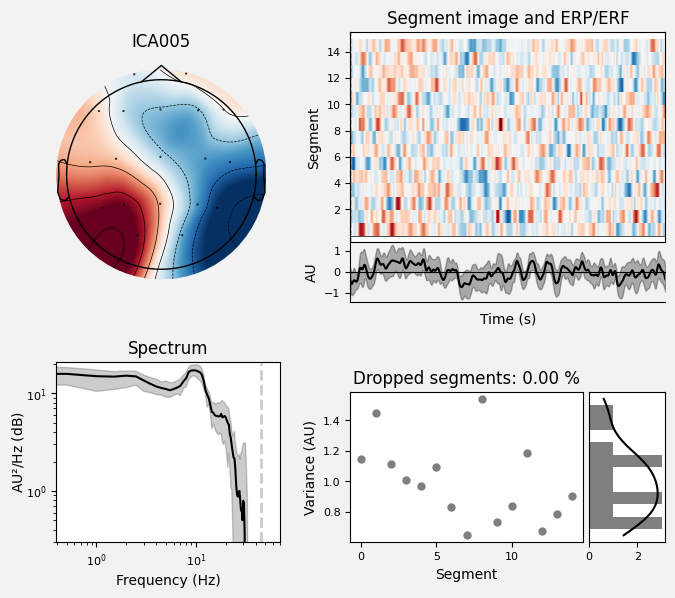

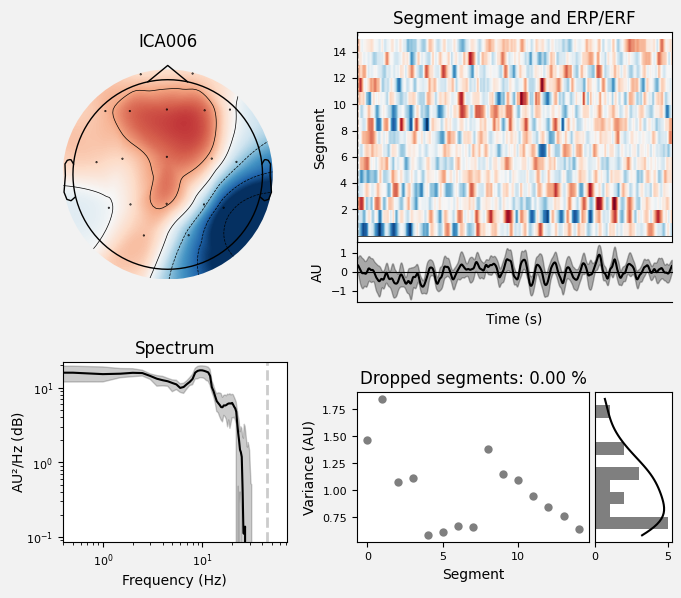

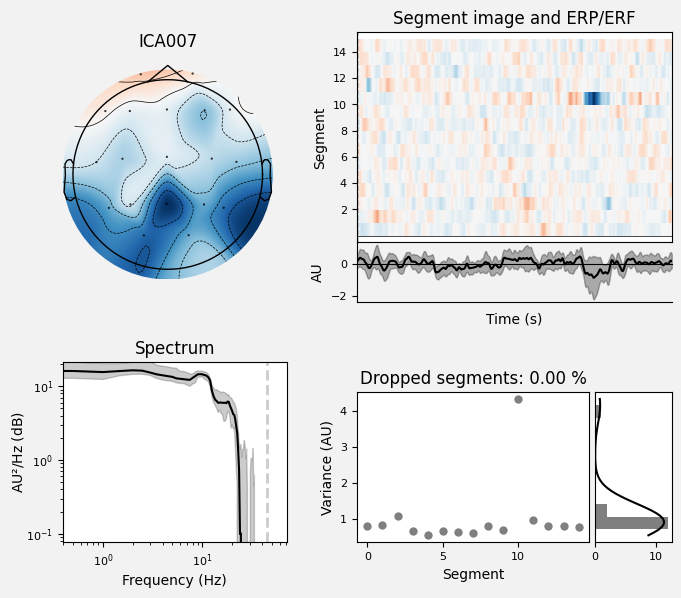

[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

In [16]:
idx = [0, 1, 2, 3, 4, 5, 6, 7]
ica.plot_properties(raw, picks=idx, log_scale=True)

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
15 matching events found
No baseline correction applied
0 projection i

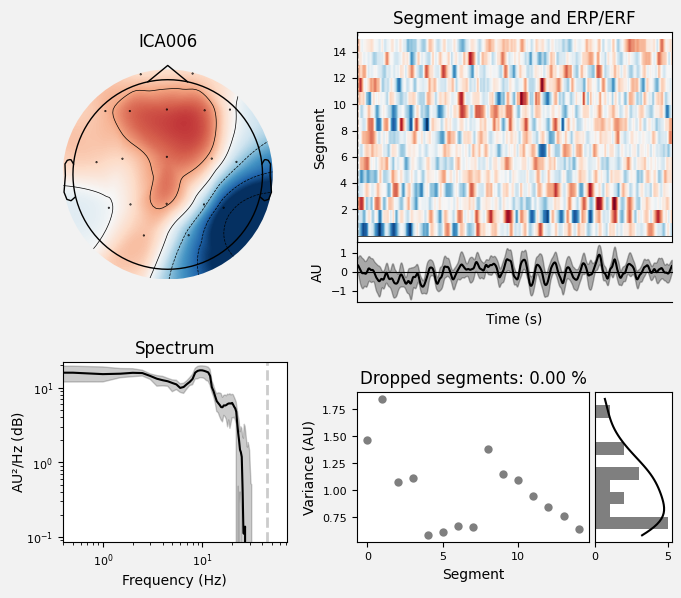

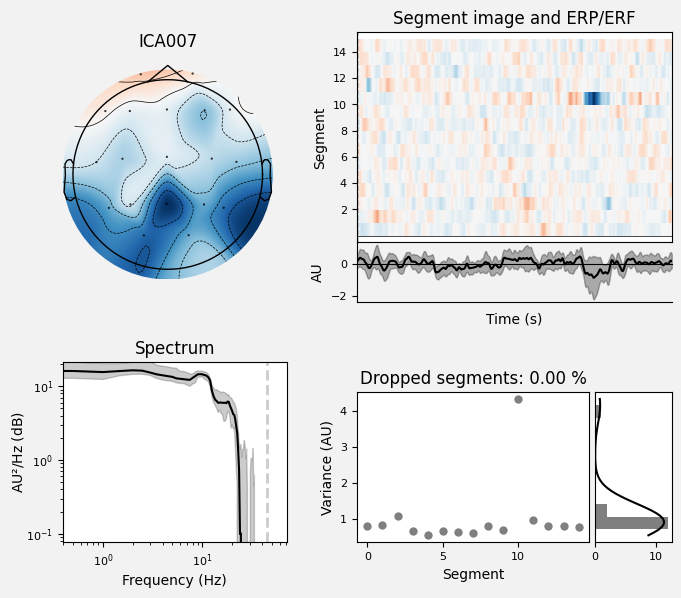

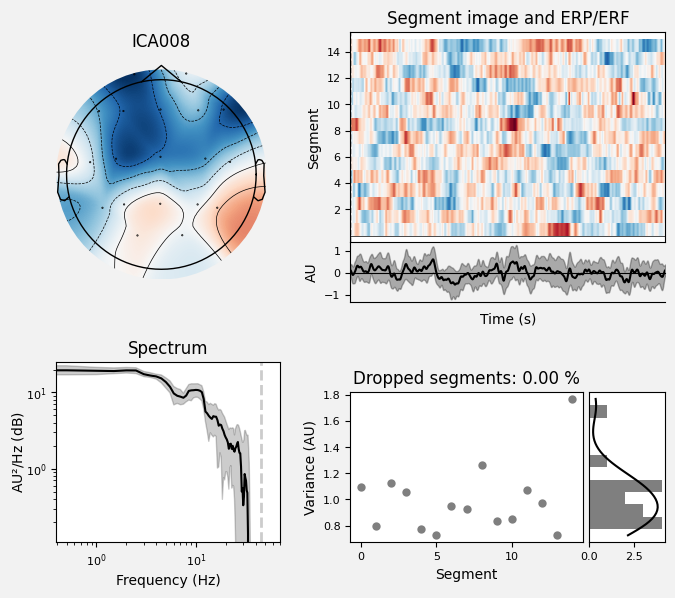

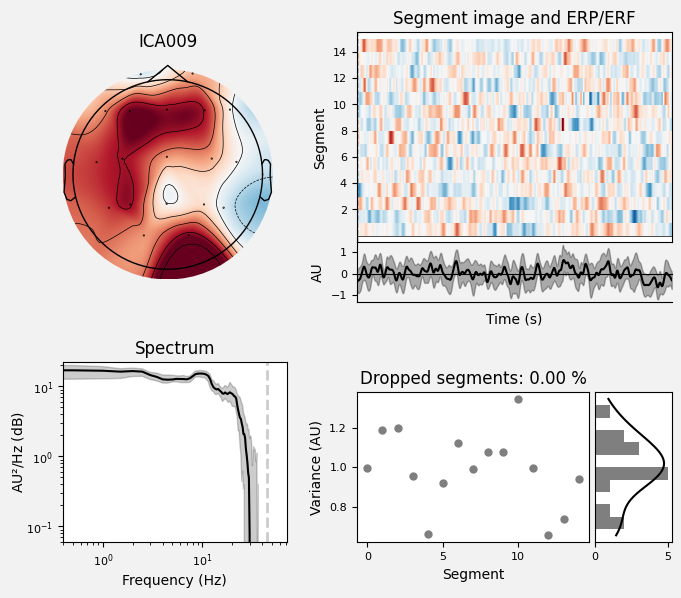

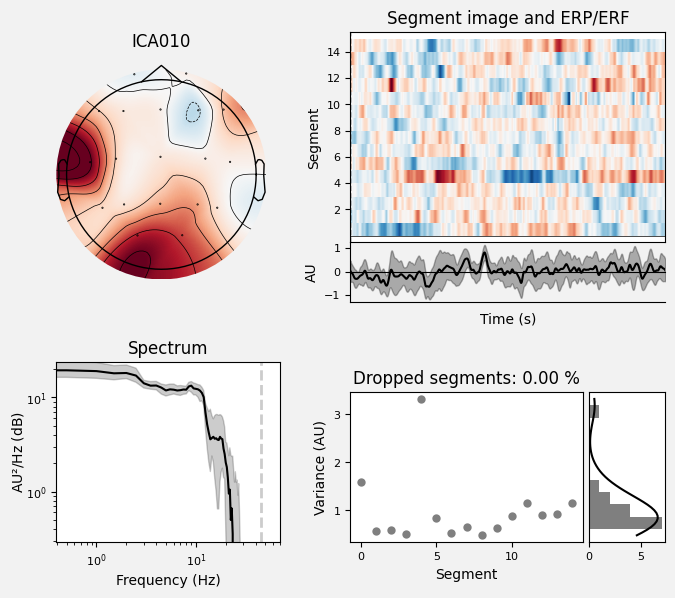

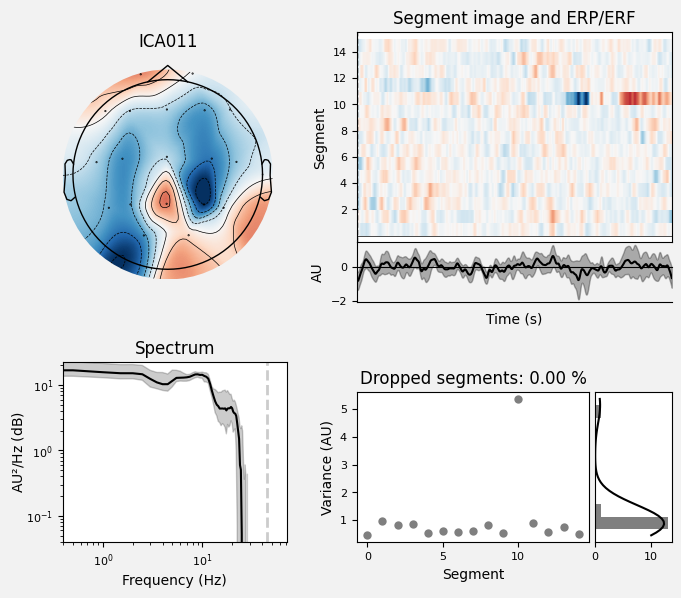

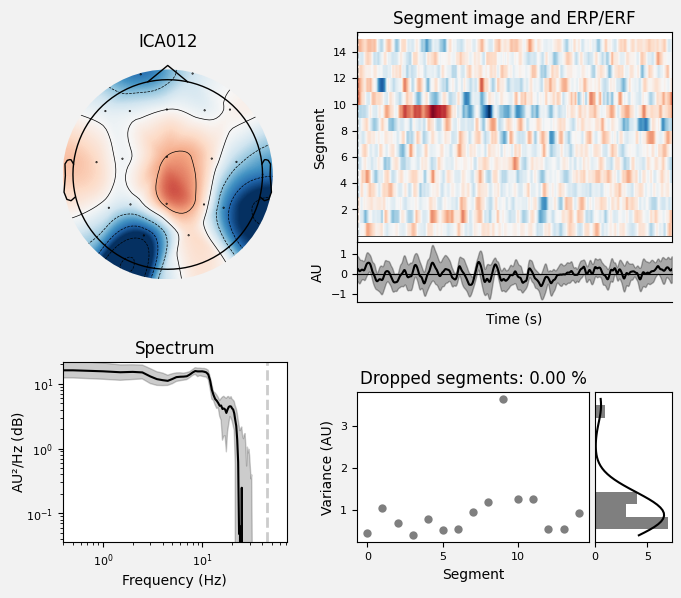

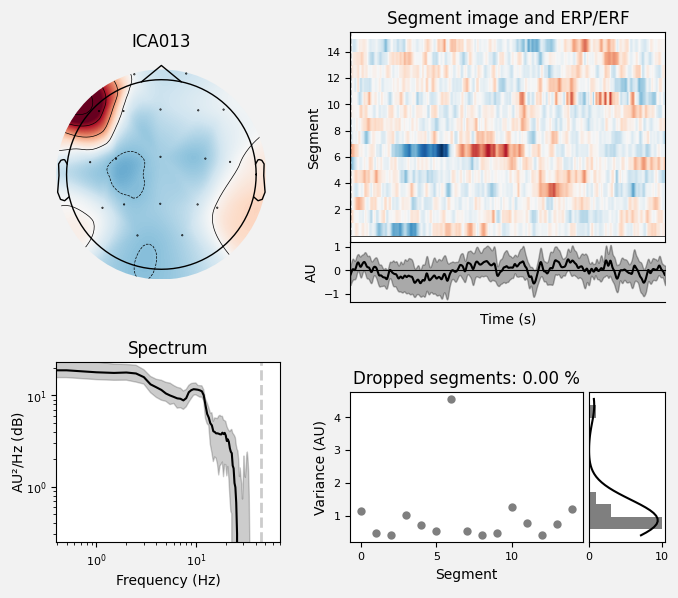

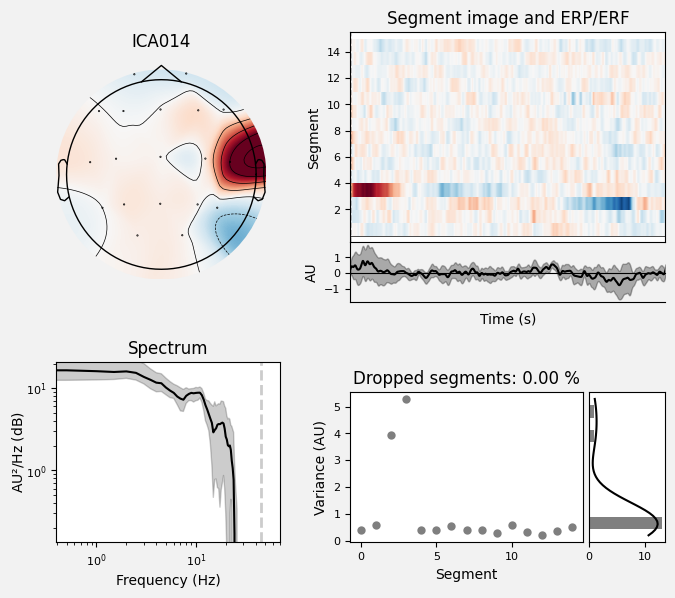

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 2 ICA components
    Projecting back using 19 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 9 ICA components
    Projecting back using 19 PCA components


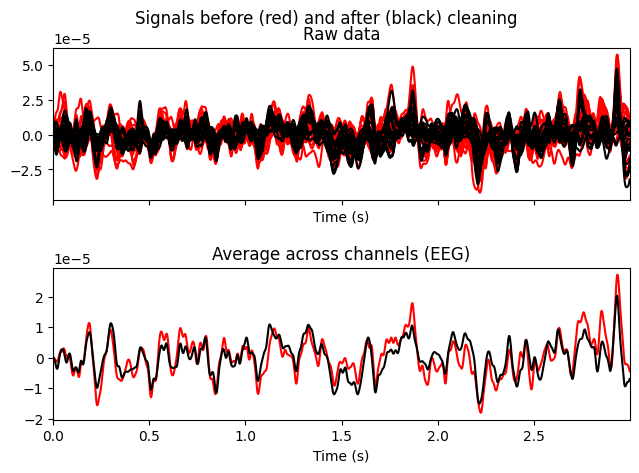

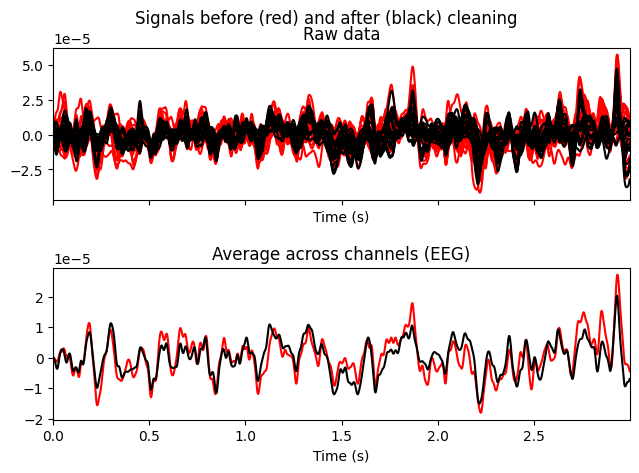

In [17]:
muscle_idx = [6, 7, 8, 9, 10, 11, 12, 13, 14]
ica.plot_properties(raw, picks=muscle_idx, log_scale=True)

# first, remove blinks and heartbeat to compare
blink_idx = [0]
heartbeat_idx = [5]
ica.apply(raw, exclude=blink_idx + heartbeat_idx)
ica.plot_overlay(raw, exclude=muscle_idx)

Effective window size : 0.512 (s)


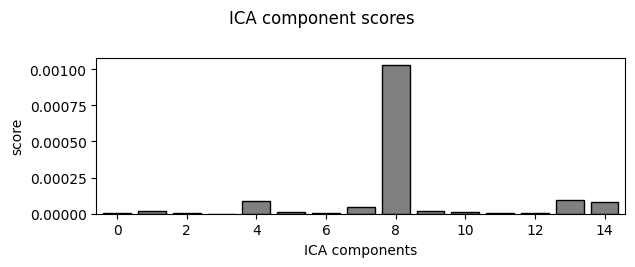

Manually found muscle artifact ICA components:      [6, 7, 8, 9, 10, 11, 12, 13, 14]
Automatically found muscle artifact ICA components: []


In [18]:
muscle_idx_auto, scores = ica.find_bads_muscle(raw)
ica.plot_scores(scores, exclude=muscle_idx_auto)
print(
    f"Manually found muscle artifact ICA components:      {muscle_idx}\n"
    f"Automatically found muscle artifact ICA components: {muscle_idx_auto}"
)

Using default location ~/mne_data for EEGBCI...


Do you want to set the path:
    C:\Users\Equipo\mne_data
as the default EEGBCI dataset path in the mne-python config [y]/n? y
Extracting EDF parameters from C:\Users\Equipo\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 529 samples (3.306 sec)

Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 15 components


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.3s.
Creating RawArray with float64 data, n_channels=15, n_times=9760
    Range : 0 ... 9759 =      0.000 ...    60.994 secs
Ready.


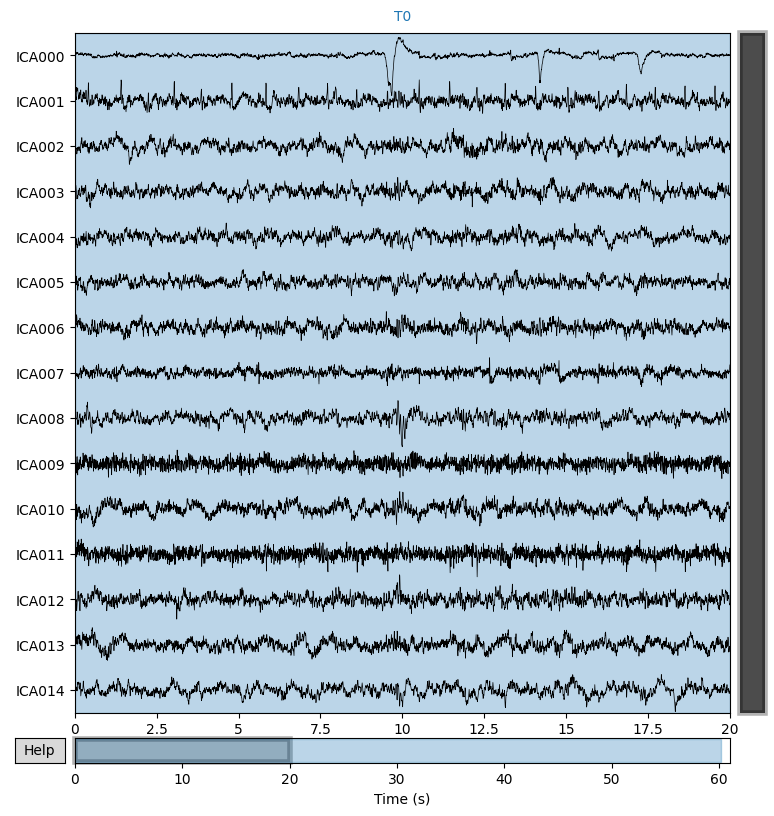

Effective window size : 1.600 (s)
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated


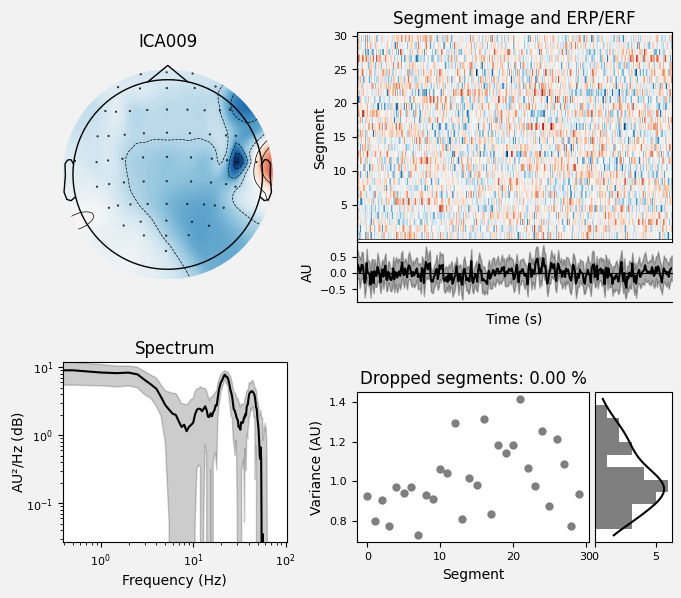

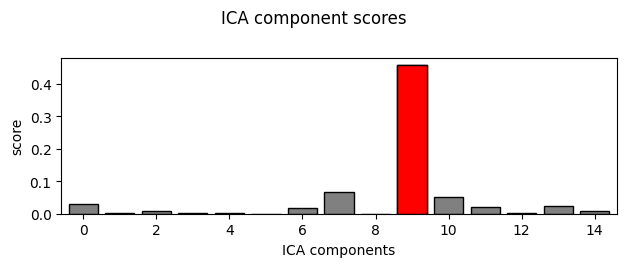

Manually found muscle artifact ICA components:      [6, 7, 8, 9, 10, 11, 12, 13, 14]
Automatically found muscle artifact ICA components: [9]
Extracting EDF parameters from C:\Users\Equipo\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S002\S002R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 529 samples (3.306 sec)

Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 15 components


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.3s.
Creating RawArray with float64 data, n_channels=15, n_times=9760
    Range : 0 ... 9759 =      0.000 ...    60.994 secs
Ready.


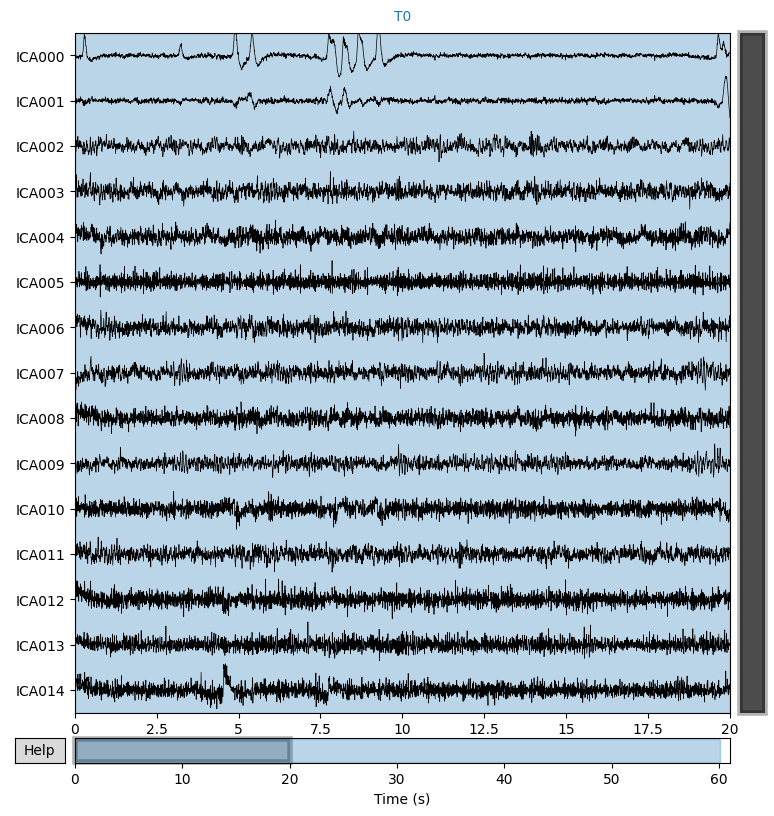

Effective window size : 1.600 (s)
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated


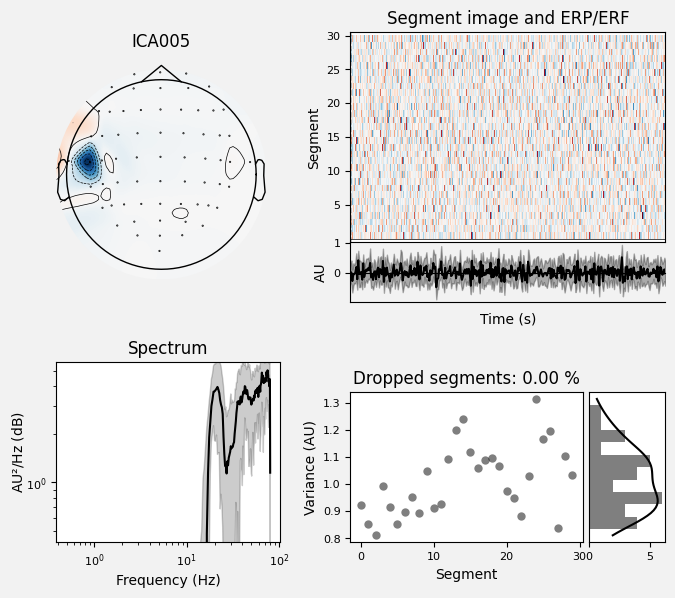

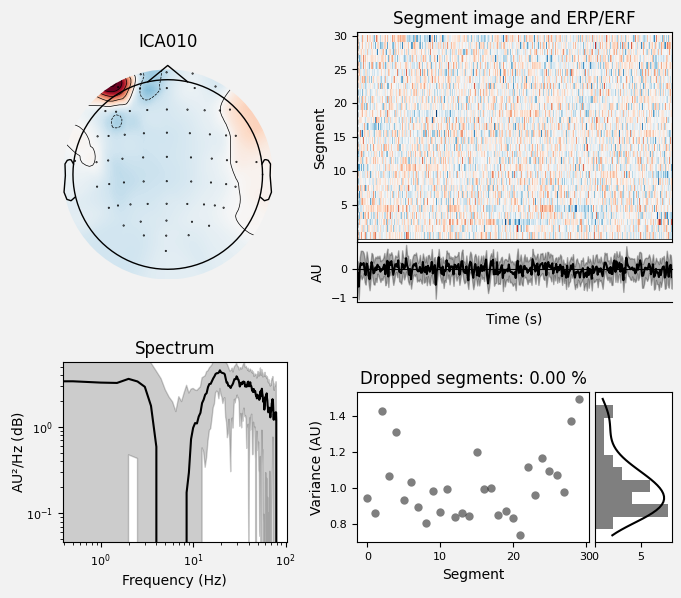

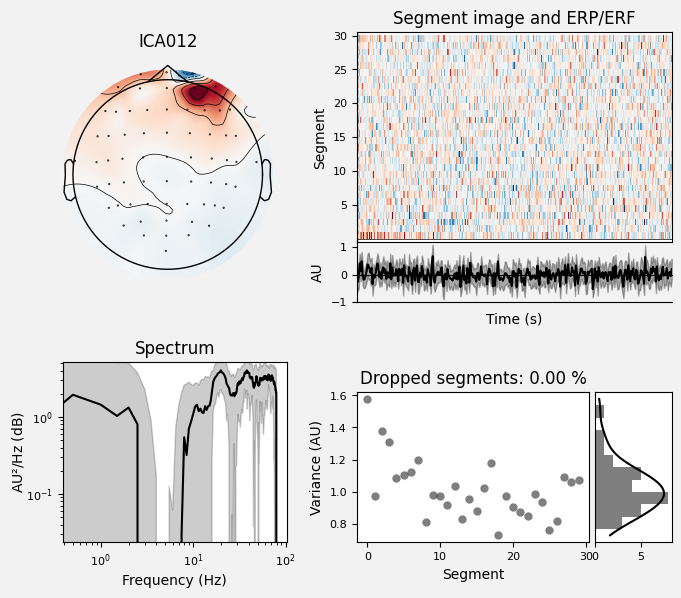

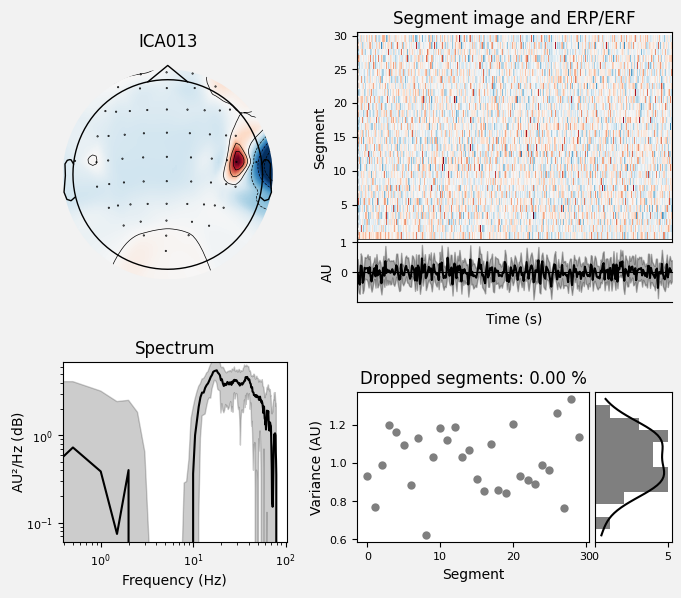

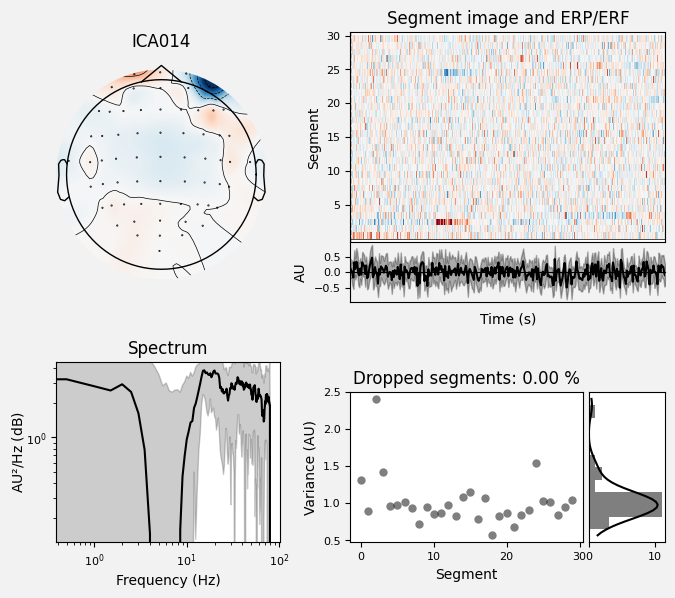

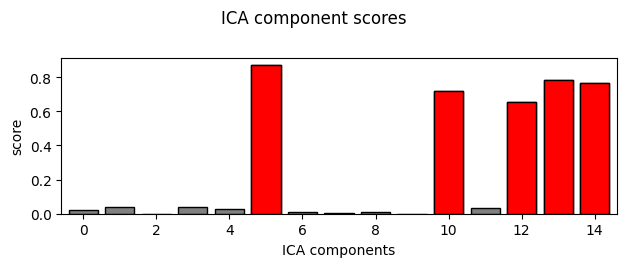

Manually found muscle artifact ICA components:      [6, 7, 8, 9, 10, 11, 12, 13, 14]
Automatically found muscle artifact ICA components: [5, 10, 12, 13, 14]


In [19]:
for sub in (1, 2):
    raw = mne.io.read_raw_edf(
        mne.datasets.eegbci.load_data(subject=sub, runs=(1,))[0], preload=True
    )
    mne.datasets.eegbci.standardize(raw)  # set channel names
    montage = mne.channels.make_standard_montage("standard_1005")
    raw.set_montage(montage)
    raw.filter(l_freq=1.0, h_freq=None)

    # Run ICA
    ica = mne.preprocessing.ICA(
        n_components=15, method="picard", max_iter="auto", random_state=97
    )
    ica.fit(raw)
    ica.plot_sources(raw)
    muscle_idx_auto, scores = ica.find_bads_muscle(raw)
    ica.plot_properties(raw, picks=muscle_idx_auto, log_scale=True)
    ica.plot_scores(scores, exclude=muscle_idx_auto)

    print(
        f"Manually found muscle artifact ICA components:      {muscle_idx}\n"
        "Automatically found muscle artifact ICA components: "
        f"{muscle_idx_auto}"
    )